In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [7]:
# this is an adjustment or regularization in linear regression 
class RidgeRegression:

    def __init__(self):
        self.coeff_ = None
        self.intercept_ = None
        self.m = 0
        self.b = 0
        self.learning_rate = 0.1
        self.epoch = 300
        self.regulatory_features = None

    def fit_simple_regression(self,x_train,y_train,regulatory_features=0.1):
        self.regulatory_features = regulatory_features
        numerator = 0
        denominator = 0
        for i in range(x_train.shape[0]):
            numerator += (y_train[i] - y_train.mean())*(x_train[i]-x_train.mean())
            denominator += (x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())

        self.coeff_ = numerator/(denominator+self.regulatory_features)
        self.intercept_ = y_train.mean()-(self.coeff_*x_train.mean())
        return self.coeff_,self.intercept_


    def fit_multiple_linear_regression_ndimension(self,x_train,y_train,regulatory_features):
        self.regulatory_features = regulatory_features
        x_train = np.insert(x_train,0,1,axis=1)
        I = np.identity(x_train.shape[1])
        I[0][0] = 0
        beta = np.linalg.inv(np.dot(x_train.T,x_train)+self.regulatory_features*I).dot(x_train.T,y_train)
        self.coeff_ = beta[1:]
        self.intercept_ = beta[0]

    def predict(self,x_test):
        return np.dot(x_test,self.coeff_)+self.intercept_


In [4]:
df = pd.read_csv('datasets/placement.csv')
df.head(5)
x_train, x_test, y_train, y_test = train_test_split(df["cgpa"], df["package"], test_size=0.2, random_state=42)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.7730984312051673

In [9]:
ll = RidgeRegression()
ll.fit_simple_regression(x_train.values,y_train.values)
y_prediction = ll.predict(x_test.values)
r2_score(y_test,y_prediction)

0.7731426960761152

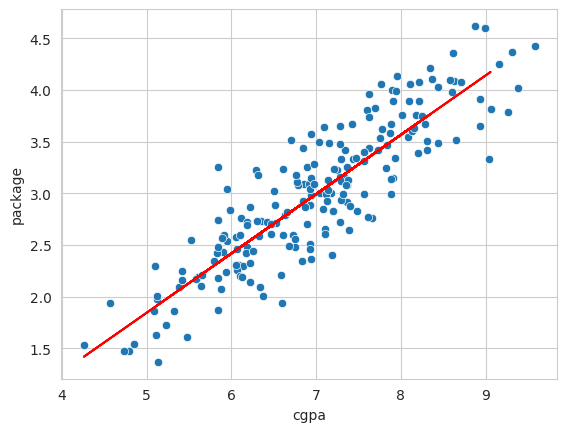

In [10]:
sns.scatterplot(data= df,x='cgpa',y='package')
plt.plot(x_test,ll.predict(x_test.values),color = 'red')